<a href="https://colab.research.google.com/github/Aadil-tai/google-colab-testing/blob/main/missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Missing Values

In this section, we'll be learning different missing value imputation techniques by analyzing simulated customer lifetime value data. Customer Lifetime Value is the total monetary worth the customer has to the business, over the course of its business-customer relationship. In this dataset, to keep things simple, we'll be using purchases as a proxy for CLV.

We'll be covering how to:

- Check the number of null values

- Dropping Null Values

- Mean/Median/Mode Imputation

- Multiple Imputation using Regression

- Imputation using Nearest Neighbors

Let's get started!

## Import Libraries

First, we'll need to import the relevant libraries. We'll be using the standard `pandas`, `numpy` libraries for data manipulation. We'll then be using `sklearn` for the more advanced imputation techniques. We will use `scipy` for the `mode` imputation later on:

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from google.colab import drive
import pandas as pd

## Load Data

Next, we'll load our customer lifetime value dataset. You'll see in our dataset, we have about 6 columns. The `purchases` column is the column we care about in our customer lifetime value problem.

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls drive/'My Drive'/'Colab Notebooks'/'Machine learning 365'/'Data Preprocessing'/'dealing with null values'/'clv_data.csv'



'drive/My Drive/Colab Notebooks/Machine learning 365/Data Preprocessing/dealing with null values/clv_data.csv'


In [ ]:
import random

df = pd.read_csv('drive/My Drive/Colab Notebooks/Machine learning 365/Data Preprocessing/dealing with null values/clv_data.csv')

df['lifetime_value'] = df['purchases'] * 20

df.head()

,Unnamed: 0,id,age,gender,income,days_on_platform,city,purchases,lifetime_value
0,0,0,NaN,Male,126895,14.0,San Francisco,0,0
1,1,1,NaN,Male,161474,14.0,Tokyo,0,0
2,2,2,24.0,Male,104723,34.0,London,1,20
3,3,3,29.0,Male,43791,28.0,London,2,40
4,4,4,18.0,Female,132181,26.0,London,2,40


from matplotlib import pyplot as plt
_df_0['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['income'].plot(kind='hist', bins=20, title='income')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('city').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Unnamed: 0', y='id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='id', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='age', y='income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='income', y='days_on_platform', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('city')):
  _plot_series(series, series_name, i)
  fig.legend(title='city', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['income']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('income')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['income']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('city')):
  _plot_series(series, series_name, i)
  fig.legend(title='city', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('income')

from matplotlib import pyplot as plt
_df_14['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['income'].plot(kind='line', figsize=(8, 4), title='income')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['city'].value_counts()
    for x_label, grp in _df_18.groupby('gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender')
_ = plt.ylabel('city')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Unnamed: 0', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['city'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Unnamed: 0', y='city', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='id', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['city'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='id', y='city', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_23['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_27.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_28.groupby('city').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='index', y='Unnamed: 0', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='Unnamed: 0', y='id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31.plot(kind='scatter', x='id', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32.plot(kind='scatter', x='age', y='income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_33.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_34.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('city')):
  _plot_series(series, series_name, i)
  fig.legend(title='city', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['income']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_35.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('income')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['income']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_36.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('city')):
  _plot_series(series, series_name, i)
  fig.legend(title='city', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('income')

from matplotlib import pyplot as plt
_df_37['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_38['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_39['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_40['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['city'].value_counts()
    for x_label, grp in _df_41.groupby('gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('gender')
_ = plt.ylabel('city')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_42['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_42, x='index', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_43['city'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_43, x='index', y='city', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_44['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_44, x='Unnamed: 0', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_45['city'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_45, x='Unnamed: 0', y='city', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import os

# Specify the path where you want to create the folder
folder_path = "/content/drive/My Drive/Colab Notebooks/Machine learning 365/Testing"

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print("Folder created successfully!")
else:
    print("Folder already exists.")


Folder already exists.


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/Machine learning 365/'


/content/drive/My Drive/Colab Notebooks/Machine learning 365


In [ ]:
from google.colab import files

# Upload the IPYNB file
uploaded = files.upload()


Saving process for office at giftcity.pdf to process for office at giftcity.pdf


In [ ]:
!pip install --upgrade google-colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.8 MB/s eta 0:00:00


In [ ]:
import google.colab.drive

In [ ]:
from google.colab import drive
# Specify the parent folder ID
parent_folder_id = 'drive/My Drive/Colab Notebooks/Machine learning 365/'  # Replace with the actual parent folder ID

# Create the new folder
folder_name = 'Test'
folder = drive.CreateFolder({'title': folder_name, 'mimeType': 'application/vnd.google-apps.folder', 'parents': [{'id': parent_folder_id}]})
folder.Execute()

# Print the ID of the newly created folder
print(f'New folder ID: {folder["id"]}')

AttributeError: module 'google.colab.drive' has no attribute 'CreateFolder'

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create GoogleDrive object
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create a new folder
folder_metadata = {'title': folder_name, 'parents': [{'id': parent_folder_id}]}
folder = drive.CreateFile(folder_metadata)
folder.Execute()
# Print the ID of the newly created folder
print(f'New folder ID: {folder["id"]}')

AttributeError: 'GoogleDriveFile' object has no attribute 'Execute'

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create GoogleDrive object
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create a new folder
folder_metadata = {'title': folder_name, 'parents': [{'id': parent_folder_id}]}
folder = drive.CreateFile(folder_metadata)
folder.Insert()  # Use Insert() instead of Execute()

# Print the ID of the newly created folder
print(f'New folder ID: {folder["id"]}')

AttributeError: 'GoogleDriveFile' object has no attribute 'Insert'

<ipython-input-40-b7ff56f91973>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='id', y='city', inner='box', palette='Dark2')


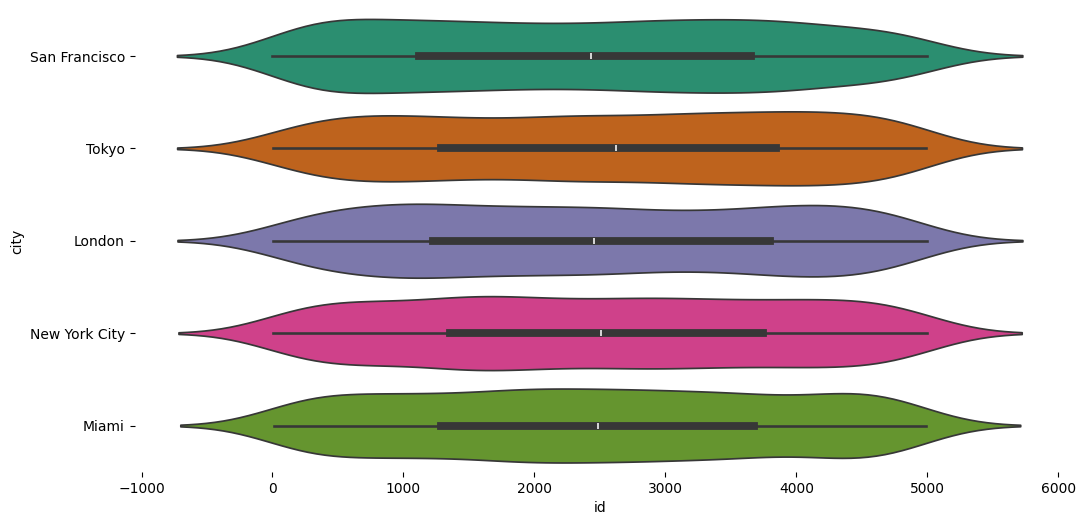

In [ ]:
# @title city vs id

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['city'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='id', y='city', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

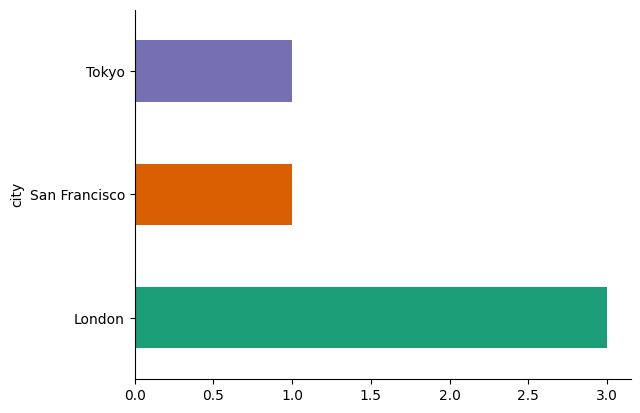

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('city').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
random.randint(5,50)

11

## Checking Null Values

The first step in any data analysis or ML model is to check null values. We can check the number of nulls in a single line:

In [ ]:
df.isnull().sum()

Unnamed: 0             0
id                     0
age                 2446
gender                 0
income                 0
days_on_platform     141
city                   0
purchases              0
lifetime_value         0
dtype: int64

However, if you want to see the percentages, we wrote a function you can use:

In [ ]:
def nulls_summary_table(df):
    """
    Returns a summary table showing null value counts and percentage

    Parameters:
    df (DataFrame): Dataframe to check

    Returns:
    null_values (DataFrame)
    """
    null_values = pd.DataFrame(df.isnull().sum())
    null_values[1] = null_values[0]/len(df)
    null_values.columns = ['null_count','null_pct']
    return null_values

nulls_summary_table(df)

,null_count,null_pct
Unnamed: 0,0,0.0000
id,0,0.0000
age,2446,0.4892
gender,0,0.0000
income,0,0.0000
days_on_platform,141,0.0282
city,0,0.0000
purchases,0,0.0000
lifetime_value,0,0.0000


### Dropping Null Values

Dropping nulls is the quickest and easiest method to dropping nulls. We will use the internal pandas method `dropna` which will simply drop all rows that contain nulls:

In [ ]:
drop_df = df.copy()

drop_df = drop_df.dropna()

In [ ]:
X_d = drop_df[['age','days_on_platform','income']]
y_d = drop_df['lifetime_value']


X_train_d = X_d[:4000]
y_train_d = y_d[:4000]

X_test_d = X_d[1000:]
y_test_d = y_d[1000:]

### Mean/Median/Mode Imputation

The next is mean/median/mode imputation. We can use the native numpy functions for the mean and median. We can use scipy for the mode. Then, pandas as a native `fillna` method we can use to impute the nulls with the mean/median/mode:

In [ ]:
m_df = df.copy()

X_m = m_df[['age','days_on_platform','income']]
y_m = m_df['lifetime_value']


X_train_m = X_m[:4000]
y_train_m = y_m[:4000]

X_test_m = X_m[1000:]
y_test_m = y_m[1000:]

In [ ]:
## Mean
X_train_m.loc[:,'age'] = X_train_m['age'].fillna(np.mean(X_train_m['age']))
X_test_m.loc[:,'age'] = X_test_m['age'].fillna(np.mean(X_train_m['age'])) ## Cannot use training dataset to impute


X_train_m.loc[:,'days_on_platform'] = X_train_m['days_on_platform'].fillna(np.mean(X_train_m['days_on_platform']))
X_test_m.loc[:,'days_on_platform'] = X_test_m['days_on_platform'].fillna(np.mean(X_train_m['days_on_platform'])) ## Cannot use training dataset to impute

In [ ]:
## Median
m_df.loc[:,'age'] = m_df['age'].fillna(stats.mode(m_df['age'])[0][0])

### Multiple Imputation Using Regression

Now that we've covered the simpler imputation techniques, we'll cover a more complicated imputation technique: Multiple Imputation. Multiple Imputation requires you to have some knowledge of ML modeling because we are using an ML model to impute the missing values. We won't go over every argument, but we'll go over the key ones.

Multiple imputation has a few different estimators, using the `estimator` argument:

- `BayesianRidge`: Regularized Linear Regression

- `RandomForestRegressor`: Random Forest Model. Mimics missForest in the R language.

We'll go over how these estimators work in the next course: ML Algorithms.

The `missing_values` argument is a placeholder for the data type of the missing values you want to impute.

It's important to use `add_indicatorbool` as it'll create a placeholder indicating that you've imputed a missing value. This is important, because there could be patterns behind how a value is missing. Adding an indicator would allow you to keep track of where you made an imputation. Plus, it could also add signal into your model.

`max_iter`: The number of iteration rounds.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

## Target - Purchases in the first six months

r_df = df.copy()

X_r = r_df[['age','days_on_platform','income']]
y_r = r_df['lifetime_value']


X_train_r = X_r[:4000]
y_train_r = y_r[:4000]

X_test_r = X_r[1000:]
y_test_r = y_r[1000:]


Imp = IterativeImputer(max_iter=10, random_state = 0)
Imp.fit(X_train_r)

X_train_r = Imp.transform(X_train_r)
X_test_r = Imp.transform(X_test_r)

X_train_r = pd.DataFrame(X_train_r)
X_train_r.columns = X_train_r.columns

X_test_r = pd.DataFrame(X_test_r)
X_test_r.columns = X_test_r.columns

r_df = pd.concat([X_train_r,X_test_r],axis = 0)

### Nearest Neighbor Imputation

On top of using linear regression or random forest regression to impute values, you can also use nearest neighbors imputation. Nearest neighbor imputation essentially uses a K-Nearest Neighbors algorithm to find the most similar data points, to impute the null values.

**Important Parameters**

`missing_values`: This is the type of null value you want to impute. Typically, this is NaN, but it could be float or whichever you decide.

`n_neighbors`: The number of neighbors to use for imputation. You can add more or less. Fewer neighbors can lead to overfitting. Larger numbers will lose some precision.

`weights`: Pick how you want to weight all points in each neighborhood. There are two typical ways: `'uniform'` or `'distance'`. Uniform is equal weighting. Distance is weighted by the distance from the point.

- `callable` : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

`metric`: The distance metric used to search for neighbors. The default is euclidean.

`add_indicator`: This will add a dummy feature 0 or 1 if the value was imputed, similar to `add_indicatorbool`.

In [ ]:
imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputer.fit(X_train_r)
X_train_k = imputer.transform(X_train_r)
X_test_k = imputer.transform(X_test_r)

y_train_k = y_train_r.copy()
y_test_k = y_test_r.copy()

## Comparison

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Drop Null Model
clf_n = RandomForestRegressor(random_state=0)
clf_n.fit(X_train_d, y_train_d)
pred_dropna = clf_n.predict(X_test_d)

# Mean Imputation Model
clf_m = RandomForestRegressor(random_state=0)
clf_m.fit(X_train_m, y_train_m)
pred_m = clf_m.predict(X_test_m)

# Regression Imputation
clf_r = RandomForestRegressor(random_state=0)
clf_r.fit(X_train_r, y_train_r)
pred_r = clf_r.predict(X_test_r)

#Nearest Neighbor Imputation
clf_n = RandomForestRegressor(random_state=0)
clf_n.fit(X_train_k, y_train_k)
pred_k = clf_n.predict(X_test_k)


print('Drop Null MAE Score: %.3f' % mean_absolute_error(y_test_d,pred_dropna))
print('Mean Impute MAE Score: %.3f' % mean_absolute_error(y_test_m,pred_m))
print('Regression MAE Score: %.3f '% mean_absolute_error(y_test_r,pred_r))
print('Nearest Neighbor MAE Score: %.3f'% mean_absolute_error(y_test_k,pred_k))

Drop Null MAE Score: 7.636
Mean Impute MAE Score: 10.828
Regression MAE Score: 10.795 
Nearest Neighbor MAE Score: 10.795


## Summary

In this section, you learned about a variety of missing value imputation techniques, ranging from simple to more complex. We went over:

- Dropping Nulls

- Mean/Median/Mode Imputation

- Regression Imputation (linear and forests)

- Nearest Neighbor Imputation

In [ ]:
# prompt: now i want to convert data into csv which was processed after doing all things

r_df.to_csv('drive/My Drive/Colab Notebooks/Machine learning 365/Data Preprocessing/dealing with null values/processed_clv_data.csv')


In [ ]:
from google.colab import auth
auth.authenticate_user()


In [ ]:
!pip install requests
